In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [2]:
# Load time series data from CSV
def load_data(file_path):
    df = pd.read_csv(file_path)
    df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
    df.set_index('Date', inplace=True)
    return df

In [3]:
# Aggregation function
def aggregate_data(df, freq='M'):
    return df.resample(freq).mean()

In [4]:
# Moving average smoothing
def moving_average_smoothing(series, window):
    return series.rolling(window=window, min_periods=1).mean()

In [5]:
# Savitzky-Golay filter smoothing
def savgol_smoothing(series, window, polyorder):
    return savgol_filter(series, window_length=window, polyorder=polyorder, mode='nearest')

In [6]:
# Detrending function
def detrend(series, trend):
    return series - trend

In [7]:
# Plot results
def plot_results(series, trend, detrended, title):
    plt.figure(figsize=(12, 6))
    plt.suptitle(title)

    plt.subplot(3, 1, 1)
    plt.plot(series, label='Original Data')
    plt.legend()

    plt.subplot(3, 1, 2)
    plt.plot(trend, label='Estimated Trend', color='orange')
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.plot(detrended, label='Detrended Data', color='green')
    plt.legend()

    plt.tight_layout()
    plt.show()

<ipython-input-3-8ff93c07821d>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  return df.resample(freq).mean()


Plotting Results...


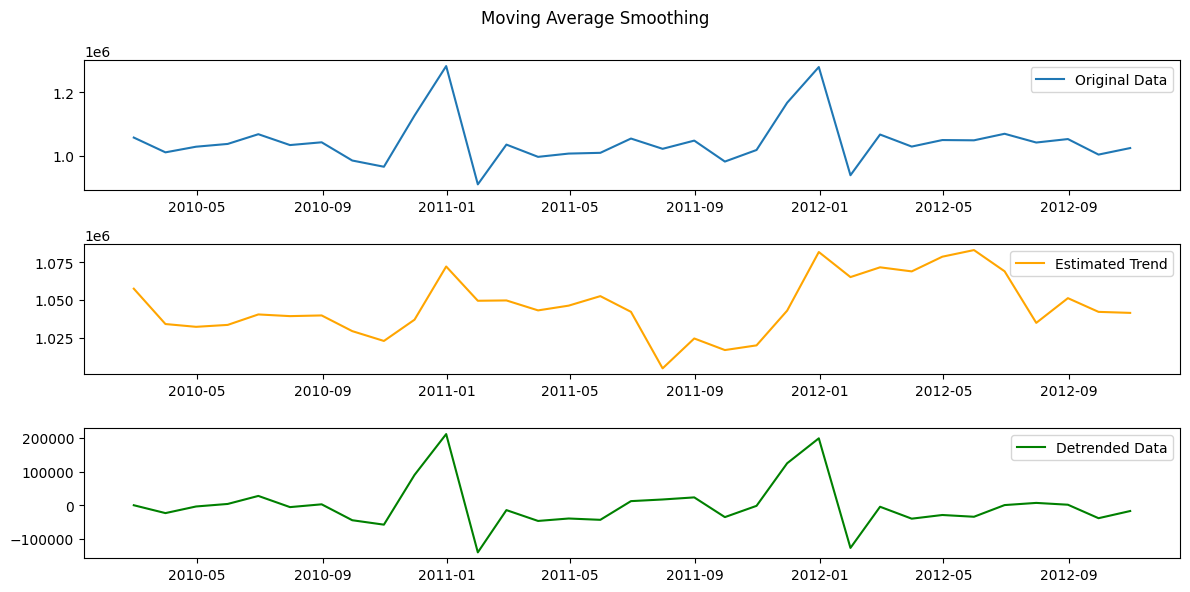

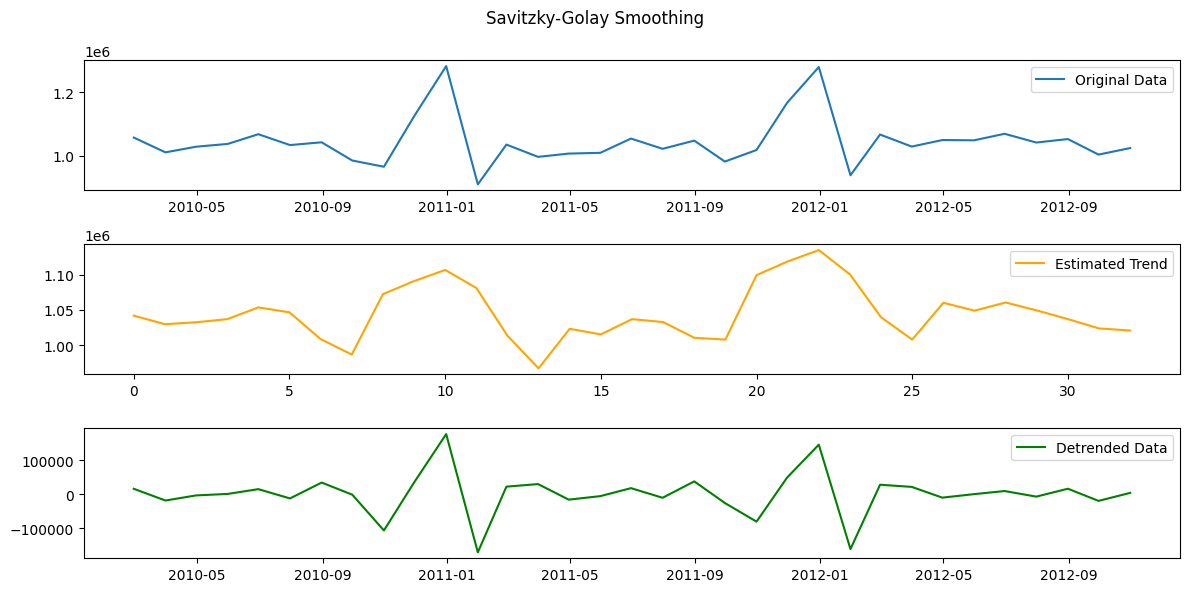

In [8]:
# Main execution
def main():
    file_path = "/content/Walmart.csv"  # Path to your file
    value_column = 'Weekly_Sales'  # Column for analysis

    df = load_data(file_path)
    aggregated_df = aggregate_data(df, freq='M')  # Aggregate data by month
    series = aggregated_df[value_column]

    # Estimate trend using moving average
    trend_ma = moving_average_smoothing(series, window=7)

    # Estimate trend using Savitzky-Golay filter
    trend_savgol = savgol_smoothing(series, window=7, polyorder=2)

    # Remove trends
    detrended_ma = detrend(series, trend_ma)
    detrended_savgol = detrend(series, trend_savgol)

    # Plot results
    print('Plotting Results...')
    plot_results(series, trend_ma, detrended_ma, 'Moving Average Smoothing')
    plot_results(series, trend_savgol, detrended_savgol, 'Savitzky-Golay Smoothing')

if __name__ == '__main__':
    main()